# 1. Introduction

We will see how world happiness changes from 2015-2017

In [2]:
import pandas as pd

happiness2015=pd.read_csv("World_Happiness_2015.csv")
happiness2016=pd.read_csv("World_Happiness_2016.csv")
happiness2017=pd.read_csv("World_Happiness_2017.csv")

happiness2015["Year"]=2015
happiness2016["Year"]=2016
happiness2017["Year"]=2017

# 2. Combining Dataframes with the Concat Function

In [11]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0=pd.concat([head_2015,head_2016],axis=0)

concat_axis1=pd.concat([head_2015,head_2016],axis=1)

print(concat_axis0)
print(concat_axis1)

question1=concat_axis0.shape[0]
question2=concat_axis1.shape[0]

       Country  Happiness Score  Year
0  Switzerland            7.587  2015
1      Iceland            7.561  2015
2      Denmark            7.527  2015
0      Denmark            7.526  2016
1  Switzerland            7.509  2016
2      Iceland            7.501  2016
       Country  Happiness Score  Year      Country  Happiness Score  Year
0  Switzerland            7.587  2015      Denmark            7.526  2016
1      Iceland            7.561  2015  Switzerland            7.509  2016
2      Denmark            7.527  2015      Iceland            7.501  2016


# 3. Combining Dataframes with the Concat Function Continued

In [10]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_axis0=pd.concat([head_2015,head_2016],axis=0)

print(concat_axis0)

rows=concat_axis0.shape[0]
columns=concat_axis0.shape[1]

   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
0  2016      Denmark            7.526             NaN
1  2016  Switzerland            7.509             NaN
2  2016      Iceland            7.501             NaN


# 4. Combining Dataframes with Different Shapes Using the Concat Function

In [12]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)

concat_update_index=pd.concat([head_2015,head_2016],axis=0, ignore_index=True)
print(concat_update_index)

   Year      Country  Happiness Score  Standard Error
0  2015  Switzerland            7.587         0.03411
1  2015      Iceland            7.561         0.04884
2  2015      Denmark            7.527         0.03328
3  2015       Norway            7.522         0.03880
4  2016      Denmark            7.526             NaN
5  2016  Switzerland            7.509             NaN
6  2016      Iceland            7.501             NaN


# 5. Joining Dataframes with the Merge Function

In [18]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged=pd.merge(left=three_2015,right=three_2016,on="Country")

print(three_2015)
print(three_2016)
print(merged)

   Country  Happiness Rank  Year
2  Denmark               3  2015
3   Norway               4  2015
4   Canada               5  2015
   Country  Happiness Rank  Year
2  Iceland               3  2016
3   Norway               4  2016
4  Finland               5  2016
  Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Norway                 4    2015                 4    2016


# 6. Joining on Columns with the Merge Function

There are actually four different types of joins:

1. Inner: only includes elements that appear in both dataframes with a common key
2. Outer: includes all data from both dataframes
3. Left: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes
4. Right: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes


In [22]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]

merged_left = pd.merge(left=three_2015, right=three_2016, on='Country',how="left")

merged_left_updated=pd.merge(left=three_2016,right=three_2015, on="Country",how="left")

print(merged_left)
print(merged_left_updated)

   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Denmark                 3    2015               NaN     NaN
1   Norway                 4    2015               4.0  2016.0
2   Canada                 5    2015               NaN     NaN
   Country  Happiness Rank_x  Year_x  Happiness Rank_y  Year_y
0  Iceland                 3    2016               NaN     NaN
1   Norway                 4    2016               4.0  2015.0
2  Finland                 5    2016               NaN     NaN


Based on the results of this exercise, when using a left join, does changing the dataframe assigned to the left and right parameters change the result? Try to answer this question before moving onto the next screen.

Yes, changing the dataframe assigned to the left and right parameters makes a difference. It is equivilant to changing the join type from left to right.

# 7. Left Joins with the Merge Function

In [24]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')

merged_suffixes=pd.merge(left=three_2015,right=three_2016,how="left",on="Country",suffixes=("_2015","_2016"))
merged_updated_suffixes=pd.merge(left=three_2016,right=three_2015,how="left",on="Country",suffixes=("_2016","_2015"))

print(merged_suffixes)
print(merged_updated_suffixes)

   Country  Happiness Rank_2015  Year_2015  Happiness Rank_2016  Year_2016
0  Denmark                    3       2015                  NaN        NaN
1   Norway                    4       2015                  4.0     2016.0
2   Canada                    5       2015                  NaN        NaN
   Country  Happiness Rank_2016  Year_2016  Happiness Rank_2015  Year_2015
0  Iceland                    3       2016                  NaN        NaN
1   Norway                    4       2016                  4.0     2015.0
2  Finland                    5       2016                  NaN        NaN


# 8. Join on Index with the Merge Function

In [30]:
import pandas as pd
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))

rows=4
columns=6

merge_index_left=pd.merge(left=four_2015,right=three_2016,how="left",left_index=True,right_index=True,suffixes=("_2015","_2016"))

print(merge_index_left)

  Country_2015  Happiness Rank_2015  Year_2015 Country_2016  \
2      Denmark                    3       2015      Iceland   
3       Norway                    4       2015       Norway   
4       Canada                    5       2015      Finland   
5      Finland                    6       2015          NaN   

   Happiness Rank_2016  Year_2016  
2                  3.0     2016.0  
3                  4.0     2016.0  
4                  5.0     2016.0  
5                  NaN        NaN  


# 9. Challenge: Combine Data and Create a Visualization

                      Country          Region  Happiness Rank  \
0                 Switzerland  Western Europe             1.0   
1                     Iceland  Western Europe             2.0   
2                     Denmark  Western Europe             3.0   
3                      Norway  Western Europe             4.0   
4                      Canada   North America             5.0   
..                        ...             ...             ...   
150                    Rwanda             NaN             NaN   
151                     Syria             NaN             NaN   
152                  Tanzania             NaN             NaN   
153                   Burundi             NaN             NaN   
154  Central African Republic             NaN             NaN   

     Happiness Score  Standard Error  Economy (GDP per Capita)    Family  \
0              7.587         0.03411                   1.39651  1.349510   
1              7.561         0.04884                   1.30232  1.4

<AxesSubplot:title={'center':'Mean Happiness Scores by Year'}, ylabel='Year'>

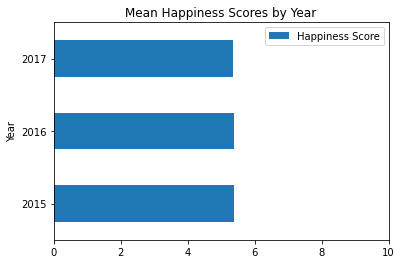

In [41]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined=pd.concat([happiness2015,happiness2016,happiness2017],axis=0)
print(combined)

pivot_table_combined=combined.pivot_table(index="Year",values="Happiness Score")

print(pivot_table_combined)

pivot_table_combined.plot(kind="barh",title="Mean Happiness Scores by Year",xlim=(0,10))


It seems as though World Happiness has actually decreased slighhtly from 2015 to 2017. However, this decrease is pretty insignificant, so it might be more accurate to say that they stagnated over this time period.

# 10. Next steps

In the last exercise, we confirmed that the mean world happiness score stayed approximately the same from 2015 to 2017.

In this lesson, we learned how to combine data using the pd.concat() and pd.merge() functions. In your travels with pandas, you may happen upon the df.append() and df.join() methods, which are basically shortcuts for the concat() and merge() functions. We didn't cover them in this lesson, as the differences are few, but if you want to learn more about them, check out this documentation.

As we saw in the last screen, in order to perform more complex analysis, we have to be able to clean and manipulate data, whether it be adding data to a dataframe or renaming a column. In the next lesson, we'll continue building on what we've learned so far as we learn ways to transform and reshape our data.

